In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from config import Config
from services.openai_service import OpenAIService
from generators.agent_v1 import AgentV1
from services.weaviate_service import WeaviateService
from services.query_processor import QueryProcessor

# Load configuration
config = Config()

openai_service = OpenAIService(config.OPENAI_API_KEY, config)
query_processor = QueryProcessor(openai_service=openai_service)

# Initialize services
weaviate_service = WeaviateService()
await weaviate_service.initialize_weaviate(config.OPENAI_API_KEY, config.WEAVIATE_URL, config.RESET_WEAVIATE)


agent_v1 = AgentV1(weaviate_service, query_processor, openai_service)

INFO:httpx:HTTP Request: GET http://localhost:8080/v1/schema "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET http://localhost:8080/v1/schema "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET http://localhost:8080/v1/schema "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET http://localhost:8080/v1/schema "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:root: Weaviate schema is valid: True
INFO:root: Weaviate schema info: Weaviate Schema Information

Class: Product (Entries: 768)
Properties:
  - Name: name, Type: text, Description: The name of the product.
  - Name: ids, Type: text, Description: ids of the products
  - Name: manufacturer, Type: text, Description: The manufacturer of the product.
  - Name: form_factor, Type: text, Description: The form of the product.
  - Name: processor, Type: text, Description: The processor of the product.
  - Name: core_coun

===:> Initializing Weaviate


## Helper Functions

In [2]:
from models.message import RequestMessage
from typing import List


async def run_test(architecture, message: str, chat_history: List[RequestMessage] = None):
    if chat_history is None:
        chat_history = []

    print(f"Running test for {architecture.__class__.__name__}")
    print(f"Input: {message}")

    if isinstance(architecture, AgentV1):
        mock_message = RequestMessage(
            id="test",
            content=message,
            timestamp="2023-01-01T00:00:00Z",
            session_id="test",
            model="gpt-4o",
            architecture_choice="semantic-router-v1",
            history_management_choice="keep-all",
        )
        response, stats = await architecture.run(mock_message, chat_history)
    else:
        response, stats = await architecture.run(message, chat_history)

    print(f"Output: {response}")
    print(f"Stats: {stats}")
    print("\n" + "-" * 50 + "\n")

    return response, stats  # Return the results

## Prompts


In [3]:
clear_intent_1 = "What are the available NXP powered Computer on Module products that include SATA 3.0 interface?"

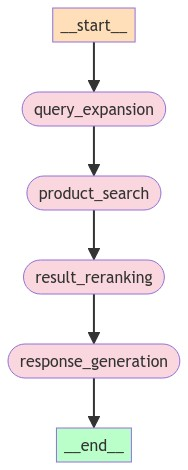

In [4]:
from IPython.display import Image, display

try:
    display(Image(agent_v1.workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
result = await run_test(agent_v1, clear_intent_1)

INFO:generators.agent_v1:Running agent with message: id='test' content='What are the available NXP powered Computer on Module products that include SATA 3.0 interface?' timestamp=datetime.datetime(2023, 1, 1, 0, 0, tzinfo=TzInfo(UTC)) session_id='test' model='gpt-4o' architecture_choice='semantic-router-v1' history_management_choice='keep-all' is_user_message=True
INFO:root:initial state: {'model_name': 'gpt-4o', 'chat_history': [], 'current_message': 'What are the available NXP powered Computer on Module products that include SATA 3.0 interface?', 'agent_scratchpad': [], 'expanded_queries': [], 'search_results': [], 'final_results': []}
INFO:generators.agent_v1:Starting workflow execution
INFO:generators.agent_v1:Entering query_expansion_node


Running test for AgentV1
Input: What are the available NXP powered Computer on Module products that include SATA 3.0 interface?


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:generators.agent_v1:Expanded queries: ['NXP powered Computer on Module products with SATA 3.0 interface and high-speed storage', 'NXP based COM modules featuring SATA 3.0 interface and advanced connectivity options', 'Computer on Module products using NXP processors with SATA 3.0 interface and robust performance', 'NXP powered embedded modules with SATA 3.0 interface and industrial-grade reliability', 'NXP processor Computer on Module with SATA 3.0 interface and enhanced data transfer capabilities']
INFO:generators.agent_v1:Entering product_search_node
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Reque

+++all_results: [{'certifications': 'Not available', 'core_count': 'Quad-core (Mini) / Dual-core (Nano)', 'environmentals': 'Industrial grade, -40°C to +85°C', 'form_factor': '67.6 mm x 25 mm x 4.2 mm SODIMM', 'full_product_description': 'The TXM Computer Module series, manufactured by KaRo Electronics GmbH, features NXP i.MX 8M Mini/Nano processors. These modules are designed for embedded systems requiring high performance and low power consumption. They come with up to 4GB DDR4L SDRAM and 16GB eMMC storage. The modules support a variety of interfaces including Ethernet, USB, UART, I2C, SPI, PCIe, MIPI CSI, LVDS, and MIPI DSI. They are built to operate in industrial environments with temperatures ranging from -40°C to +85°C. The i.MX 8M Mini/Nano processors are built using advanced LPC FinFET process technology, providing enhanced system reliability and embedded security. These modules are ideal for applications in edge node computing, streaming multimedia, and machine learning.', 'fu

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Reranked names: ['CongaQMX', 'ROM NXP iMXM Plus CortexA SMARC ComputeronModule', 'ROM NXP iMXM CortexA SMARC ComputeronModule', 'TXM Computer Module', 'QSXM QFN Style SolderDown Computer On Module', 'Qseven Compliant Module', 'SMARC SAMX', 'NanoXEL COM Express Mini Size Type Module', 'NanoXAL COM Express Mini Size Type Module', 'SOM R']
INFO:root:Name to product: {'TXM Computer Module': Product(name='TXM Computer Module', ids='TX8M-1620', manufacturer='KaRo Electronics GmbH', form_factor='67.6 mm x 25 mm x 4.2 mm SODIMM', processor='NXP i.MX 8M Mini/Nano', core_count='Quad-core (Mini) / Dual-core (Nano)', processor_tdp='Not available', memory='Up to 4GB DDR4L SDRAM, 16GB eMMC', io='Ethernet, USB, UART, I2C, SPI, PCIe, MIPI CSI, LVDS, MIPI DSI', operating_system='Linux, Windows IoT', environmentals='Industrial grade, -40°C to +85°C', certifications='Not available', short_summary='TXM Com

rerank_products response from OpenAI: [{'name': 'CongaQMX', 'relevance_score': 0.95}, {'name': 'ROM NXP iMXM Plus CortexA SMARC ComputeronModule', 'relevance_score': 0.9}, {'name': 'ROM NXP iMXM CortexA SMARC ComputeronModule', 'relevance_score': 0.85}, {'name': 'TXM Computer Module', 'relevance_score': 0.8}, {'name': 'QSXM QFN Style SolderDown Computer On Module', 'relevance_score': 0.75}, {'name': 'Qseven Compliant Module', 'relevance_score': 0.7}, {'name': 'SMARC SAMX', 'relevance_score': 0.65}, {'name': 'NanoXEL COM Express Mini Size Type Module', 'relevance_score': 0.6}, {'name': 'NanoXAL COM Express Mini Size Type Module', 'relevance_score': 0.55}, {'name': 'SOM R', 'relevance_score': 0.5}]


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:generators.agent_v1:Generated response: {    "response_description": "Based on the available information, none of the NXP powered Computer on Module products explicitly mention support for the SATA 3.0 interface.",    "response_justification": "The provided summaries of the relevant products do not include any mention of SATA 3.0 interface support, which is a specific requirement in the user's query.",    "products": [        {            "name": "CongaQMX"        },        {            "name": "ROM NXP iMXM Plus CortexA SMARC ComputeronModule"        },        {            "name": "ROM NXP iMXM CortexA SMARC ComputeronModule"        },        {            "name": "TXM Computer Module"        },        {            "name": "QSXM QFN Style SolderDown Computer On Module"        }    ],    "additional_info": "You may want to refine your search or check the detailed specifications of each produc

Output: {
  "response_description": "Based on the available information, none of the NXP powered Computer on Module products explicitly mention support for the SATA 3.0 interface.",
  "response_justification": "The provided summaries of the relevant products do not include any mention of SATA 3.0 interface support, which is a specific requirement in the user's query.",
  "products": [
    {
      "name": "CongaQMX",
      "ids": "016402",
      "manufacturer": "Congatec",
      "form_factor": "Qseven Rev 2.1",
      "processor": "NXP i.MX ARM Processors (i.MX8 QuadMax, i.MX8 QuadPlus)",
      "core_count": "6 (4x ARM Cortex-A53, 2x ARM Cortex-A72, 2x ARM Cortex-M4F)",
      "processor_tdp": "2-4W",
      "memory": "Up to 8GB onboard LPDDR4 memory",
      "io": "2x USB 3.0, 1x shared USB OTG client, 2x USB 2.0, 1x SDIO, 1x SATA 3.0, 1x PCIe, I2C Bus, SPI, 4x UART, 2x CAN FD, GPIOs",
      "operating_system": "Linux Yocto, Linux, Android",
      "environmentals": "Operating Temperature R

In [5]:
result = await run_test(agent_v1, clear_intent_1)

INFO:generators.agent_v1:Running agent with message: id='test' content='What are the available NXP powered Computer on Module products that include SATA 3.0 interface?' timestamp=datetime.datetime(2023, 1, 1, 0, 0, tzinfo=TzInfo(UTC)) session_id='test' model='gpt-4o' architecture_choice='semantic-router-v1' history_management_choice='keep-all' is_user_message=True
INFO:root:initial state: {'model_name': 'gpt-4o', 'chat_history': [], 'current_message': 'What are the available NXP powered Computer on Module products that include SATA 3.0 interface?', 'agent_scratchpad': [], 'expanded_queries': [], 'search_results': [], 'final_results': []}
INFO:generators.agent_v1:Starting workflow execution
INFO:generators.agent_v1:Entering query_expansion_node


Running test for AgentV1
Input: What are the available NXP powered Computer on Module products that include SATA 3.0 interface?


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:generators.agent_v1:Expanded queries: ['NXP powered Computer on Module products with SATA 3.0 interface', 'NXP based CoM products featuring SATA 3.0 interface', 'NXP Computer on Module with SATA 3.0 connectivity', 'NXP CoM modules with SATA 3.0 support', 'NXP powered embedded modules with SATA 3.0 interface']
INFO:generators.agent_v1:Entering product_search_node
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://localhost:8080/v1/graphql "HTTP/1.1 200 OK"
INFO:generators.agent_v1:Found 14 unique products
INF

+++all_results: [{'certifications': 'Not available', 'core_count': 'Quad-core (Mini) / Dual-core (Nano)', 'environmentals': 'Industrial grade, -40°C to +85°C', 'form_factor': '67.6 mm x 25 mm x 4.2 mm SODIMM', 'full_product_description': 'The TXM Computer Module series, manufactured by KaRo Electronics GmbH, features NXP i.MX 8M Mini/Nano processors. These modules are designed for embedded systems requiring high performance and low power consumption. They come with up to 4GB DDR4L SDRAM and 16GB eMMC storage. The modules support a variety of interfaces including Ethernet, USB, UART, I2C, SPI, PCIe, MIPI CSI, LVDS, and MIPI DSI. They are built to operate in industrial environments with temperatures ranging from -40°C to +85°C. The i.MX 8M Mini/Nano processors are built using advanced LPC FinFET process technology, providing enhanced system reliability and embedded security. These modules are ideal for applications in edge node computing, streaming multimedia, and machine learning.', 'fu

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Reranked names: ['CongaQMX', 'QSXP', 'QSXM QFN Style SolderDown Computer On Module', 'ROM NXP iMXM Plus CortexA SMARC ComputeronModule', 'TXM Computer Module', 'SMARC SAMX', 'NanoXEL COM Express Mini Size Type Module', 'NanoXAL COM Express Mini Size Type Module', 'ROM NXP iMXM CortexA SMARC ComputeronModule', 'SOM R']
INFO:root:Name to product: {'TXM Computer Module': Product(name='TXM Computer Module', ids='TX8M-1620', manufacturer='KaRo Electronics GmbH', form_factor='67.6 mm x 25 mm x 4.2 mm SODIMM', processor='NXP i.MX 8M Mini/Nano', core_count='Quad-core (Mini) / Dual-core (Nano)', processor_tdp='Not available', memory='Up to 4GB DDR4L SDRAM, 16GB eMMC', io='Ethernet, USB, UART, I2C, SPI, PCIe, MIPI CSI, LVDS, MIPI DSI', operating_system='Linux, Windows IoT', environmentals='Industrial grade, -40°C to +85°C', certifications='Not available', short_summary='TXM Computer Module with N

rerank_products response from OpenAI: [{'name': 'CongaQMX', 'relevance_score': 1.0}, {'name': 'QSXP', 'relevance_score': 0.9}, {'name': 'QSXM QFN Style SolderDown Computer On Module', 'relevance_score': 0.85}, {'name': 'ROM NXP iMXM Plus CortexA SMARC ComputeronModule', 'relevance_score': 0.8}, {'name': 'TXM Computer Module', 'relevance_score': 0.75}, {'name': 'SMARC SAMX', 'relevance_score': 0.7}, {'name': 'NanoXEL COM Express Mini Size Type Module', 'relevance_score': 0.65}, {'name': 'NanoXAL COM Express Mini Size Type Module', 'relevance_score': 0.6}, {'name': 'ROM NXP iMXM CortexA SMARC ComputeronModule', 'relevance_score': 0.55}, {'name': 'SOM R', 'relevance_score': 0.5}]


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:generators.agent_v1:Generated response: {    "response_description": "The available NXP powered Computer on Module products that include a SATA 3.0 interface are listed below.",    "response_justification": "The response is appropriate as it directly addresses the user's query by identifying the products that feature both NXP processors and a SATA 3.0 interface.",    "products": [        {            "name": "CongaQMX"        }    ],    "additional_info": "Only the CongaQMX module explicitly mentions support for the SATA 3.0 interface among the listed products. If you need more options or specific features, consider refining your search criteria or providing additional details."}
INFO:generators.agent_v1:===:> Workflow execution completed: final state: {'model_name': 'gpt-4o', 'chat_history': [], 'current_message': 'What are the available NXP powered Computer on Module products that include 

Output: {
  "response_description": "The available NXP powered Computer on Module products that include a SATA 3.0 interface are listed below.",
  "response_justification": "The response is appropriate as it directly addresses the user's query by identifying the products that feature both NXP processors and a SATA 3.0 interface.",
  "products": [
    {
      "name": "CongaQMX",
      "ids": "016402",
      "manufacturer": "Congatec",
      "form_factor": "Qseven Rev 2.1",
      "processor": "NXP i.MX ARM Processors (i.MX8 QuadMax, i.MX8 QuadPlus)",
      "core_count": "6 (4x ARM Cortex-A53, 2x ARM Cortex-A72, 2x ARM Cortex-M4F)",
      "processor_tdp": "2-4W",
      "memory": "Up to 8GB onboard LPDDR4 memory",
      "io": "2x USB 3.0, 1x shared USB OTG client, 2x USB 2.0, 1x SDIO, 1x SATA 3.0, 1x PCIe, I2C Bus, SPI, 4x UART, 2x CAN FD, GPIOs",
      "operating_system": "Linux Yocto, Linux, Android",
      "environmentals": "Operating Temperature Range: 0\u00b0C to 60\u00b0C (commercial